In [2]:
import pandas as pd
import time

In [8]:
start = time.time()
mydateparser = lambda c: pd.to_datetime(c, format='%d.%m.%Y', errors='coerce')
df = pd.read_csv('training_dataset_enc.csv', parse_dates=['DATUM_IZVJESTAVANJA', 'PLANIRANI_DATUM_ZATVARANJA', 'DATUM_OTVARANJA', 'DATUM_ZATVARANJA'], date_parser=mydateparser)
end = time.time()
print(end - start)

408.60749912261963


In [11]:
del df['Unnamed: 0']; del df['Unnamed: 0.1']; 

In [12]:
df.head()

,DATUM_IZVJESTAVANJA,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,DATUM_ZATVARANJA,UGOVORENI_IZNOS,STANJE_NA_KRAJU_PRETH_KVARTALA,STANJE_NA_KRAJU_KVARTALA,VALUTA,VRSTA_KLIJENTA,PROIZVOD,VRSTA_PROIZVODA,VISINA_KAMATE,TIP_KAMATE,STAROST,PRIJEVREMENI_RASKID
0,2013-12-31,412140,7146814,2012-08-27,2018-04-30,NaT,629155.97,639373.81,641562.01,2,1420,TM0109,L,1.50,A,22,N
1,2013-12-31,772139,5521579,2010-06-11,2017-06-30,NaT,46000.00,28481.94,26887.19,1,1410,FL0801,A,9.70,B,38,N
2,2013-12-31,481985,7443823,2013-01-23,2018-02-28,NaT,44679.50,44908.40,45062.09,2,1550,FD0100,L,3.10,A,37,N
3,2013-12-31,139014,6511639,2011-09-16,2016-09-30,NaT,29959.15,19691.64,18285.89,2,1410,FL0801,A,7.95,B,49,N
4,2013-12-31,952566,6143123,2011-05-23,2014-05-31,NaT,100000.00,24797.93,15685.33,1,1410,FL0801,A,9.70,B,35,N


In [13]:
df.to_hdf('training_dataset.h5', key='df')

In [16]:
start = time.time()
df_hdf = pd.read_hdf('training_dataset.h5', 'df')
end = time.time()
print(end - start)

19.921598434448242


In [17]:
df_hdf.head()

,DATUM_IZVJESTAVANJA,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,DATUM_ZATVARANJA,UGOVORENI_IZNOS,STANJE_NA_KRAJU_PRETH_KVARTALA,STANJE_NA_KRAJU_KVARTALA,VALUTA,VRSTA_KLIJENTA,PROIZVOD,VRSTA_PROIZVODA,VISINA_KAMATE,TIP_KAMATE,STAROST,PRIJEVREMENI_RASKID
0,2013-12-31,412140,7146814,2012-08-27,2018-04-30,NaT,629155.97,639373.81,641562.01,2,1420,TM0109,L,1.50,A,22,N
1,2013-12-31,772139,5521579,2010-06-11,2017-06-30,NaT,46000.00,28481.94,26887.19,1,1410,FL0801,A,9.70,B,38,N
2,2013-12-31,481985,7443823,2013-01-23,2018-02-28,NaT,44679.50,44908.40,45062.09,2,1550,FD0100,L,3.10,A,37,N
3,2013-12-31,139014,6511639,2011-09-16,2016-09-30,NaT,29959.15,19691.64,18285.89,2,1410,FL0801,A,7.95,B,49,N
4,2013-12-31,952566,6143123,2011-05-23,2014-05-31,NaT,100000.00,24797.93,15685.33,1,1410,FL0801,A,9.70,B,35,N


In [18]:
df_hdf.shape

(5193124, 17)

In [21]:
df = df_hdf

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5193124 entries, 0 to 5193123
Data columns (total 17 columns):
DATUM_IZVJESTAVANJA               datetime64[ns]
KLIJENT_ID                        int64
OZNAKA_PARTIJE                    int64
DATUM_OTVARANJA                   datetime64[ns]
PLANIRANI_DATUM_ZATVARANJA        datetime64[ns]
DATUM_ZATVARANJA                  datetime64[ns]
UGOVORENI_IZNOS                   float64
STANJE_NA_KRAJU_PRETH_KVARTALA    float64
STANJE_NA_KRAJU_KVARTALA          float64
VALUTA                            int64
VRSTA_KLIJENTA                    int64
PROIZVOD                          object
VRSTA_PROIZVODA                   object
VISINA_KAMATE                     float64
TIP_KAMATE                        object
STAROST                           int64
PRIJEVREMENI_RASKID               object
dtypes: datetime64[ns](4), float64(4), int64(5), object(4)
memory usage: 713.2+ MB


In [42]:
df.describe()

,KLIJENT_ID,OZNAKA_PARTIJE,UGOVORENI_IZNOS,STANJE_NA_KRAJU_PRETH_KVARTALA,STANJE_NA_KRAJU_KVARTALA,VALUTA,VRSTA_KLIJENTA,VISINA_KAMATE,STAROST
count,5.193124e+06,5.193124e+06,5.193124e+06,4.772056e+06,5.193124e+06,5.193124e+06,5.193124e+06,5.141422e+06,5.193124e+06
mean,7.207398e+05,7.152089e+06,2.554007e+05,1.309054e+05,1.181028e+05,1.682643e+00,1.426380e+03,5.562767e+00,4.141305e+01
std,1.160615e+07,8.765659e+06,3.784332e+06,1.950900e+06,1.829336e+06,8.221024e-01,6.029030e+01,3.760118e+00,2.045255e+02
min,1.002000e+03,1.630070e+05,0.000000e+00,-5.981000e+01,-5.981000e+01,1.000000e+00,1.110000e+03,-4.000000e-03,-7.994000e+03
25%,3.708580e+05,4.275223e+06,2.956673e+04,6.897520e+03,4.032975e+02,1.000000e+00,1.410000e+03,2.350000e+00,3.500000e+01
50%,6.930290e+05,6.603912e+06,6.422751e+04,3.339354e+04,2.673879e+04,2.000000e+00,1.410000e+03,6.480000e+00,4.600000e+01
75%,1.033071e+06,9.142953e+06,1.150000e+05,8.280279e+04,7.627030e+04,2.000000e+00,1.410000e+03,8.740000e+00,5.700000e+01
max,9.991411e+09,1.136257e+08,6.055048e+08,6.105662e+08,6.105662e+08,5.000000e+00,1.610000e+03,8.080000e+01,9.080000e+02


In [41]:
columns = ['VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD', 'VRSTA_PROIZVODA','TIP_KAMATE'];
for column_name in columns:
    print(column_name,': ', df[column_name].unique())

VALUTA :  [2 1 3 4 5]
VRSTA_KLIJENTA :  [1420 1410 1550 1610 1430 1120 1110 1320 1210 1510 1310 1330 1350]
PROIZVOD :  ['TM0109' 'FL0801' 'FD0100' 'FL1301' 'FL1100' 'FL1200' 'FL1201' 'FL0802'
 'FL1202' 'FL1306' 'FL1309' 'FL0900' 'FL0803' 'FL1400' 'FL1600' 'FL0804'
 'FL1500' 'FL1310' 'FD0200' 'TM0104' 'FS0200' 'FL1304' 'FI0500' 'FP0100'
 'FL0201' 'FL0202' 'FL0901' 'FL0600' 'TM0102' 'TM0500' 'FE0100' 'FE0200']
VRSTA_PROIZVODA :  ['L' 'A']
TIP_KAMATE :  ['A' 'B' 'C' 'D']


(Ne)Balansiranost dataseta:

In [74]:
klijenti = df['KLIJENT_ID'].unique().tolist()

In [93]:
partije = df.loc[df['KLIJENT_ID']==klijent]

In [89]:
popis = partije.unique().tolist()

,DATUM_IZVJESTAVANJA,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,DATUM_ZATVARANJA,UGOVORENI_IZNOS,STANJE_NA_KRAJU_PRETH_KVARTALA,STANJE_NA_KRAJU_KVARTALA,VALUTA,VRSTA_KLIJENTA,PROIZVOD,VRSTA_PROIZVODA,VISINA_KAMATE,TIP_KAMATE,STAROST,PRIJEVREMENI_RASKID
0,2013-12-31,412140,7146814,2012-08-27,2018-04-30,NaT,629155.97,639373.81,641562.01,2,1420,TM0109,L,1.5,A,22,N
19970,2012-09-30,412140,7146814,2012-08-27,NaT,NaT,629155.97,NaN,625778.66,2,1420,TM0109,L,1.5,A,20,N
22024,2017-12-31,412140,7146814,2012-08-27,2018-11-30,NaT,629155.97,629757.66,631146.43,2,1420,TM0109,L,1.5,A,26,N
31845,2015-12-31,412140,7155997,2012-08-28,2018-04-03,NaT,613534.50,319002.28,277992.98,2,1420,FL0900,A,3.5,C,24,N
32663,2014-09-30,412140,7155997,2012-08-28,2018-04-03,NaT,613534.50,459423.04,442101.76,2,1420,FL0900,A,3.5,C,22,N


In [ ]:
prekidi = 0;
total = 0;
klijenti = df['KLIJENT_ID'].unique().tolist();
for klijent in klijenti: 
    extracted_table = df.loc[df['KLIJENT_ID']==klijent]
    unique_parties = extracted_table['OZNAKA_PARTIJE'].unique().tolist();
    for partija in unique_parties:
        final_extract = extracted_table.loc[extracted_table['OZNAKA_PARTIJE']== partija]
        total = total + 1;
        label = final_extract['PRIJEVREMNI_RASKID'].unique().tolist()
        if label[0]=='Y':
            prekidi = prekidi + 1;

print(prekidi)
print(total)
print(prekidi/total)

In [106]:
prekidi = df.loc[df['PRIJEVREMENI_RASKID']=='Y']
prekidi_group = prekidi.groupby(['KLIJENT_ID', 'OZNAKA_PARTIJE'])
len1 = len(prekidi_group);
print('Broj prijevremenih raskida: ', len1)

sve_grupe = df.groupby(['KLIJENT_ID', 'OZNAKA_PARTIJE'])
len2 = len(sve_grupe);
print('Broj ugovora: ', len2)
print('Postotak prijevremenih raskida u datasetu: ', len1/len2 )

Broj prijevremenih raskida:  160154
Broj ugovora:  579636
Postotak prijevremenih raskida u datasetu:  0.27630098889647986


In [62]:
klijenti = df['KLIJENT_ID'].unique().tolist()
partije = df.loc[df['KLIJENT_ID']==klijenti[0]]['OZNAKA_PARTIJE'].unique().tolist()

In [63]:
print(partije)

[7146814, 7155997, 5663819, 10219535, 9135777, 11194832]


In [98]:
df['STAROST'].values[df['STAROST'].values < 0 ] = -1
df['STAROST'].values[df['STAROST'].values >= 900 ] = -1

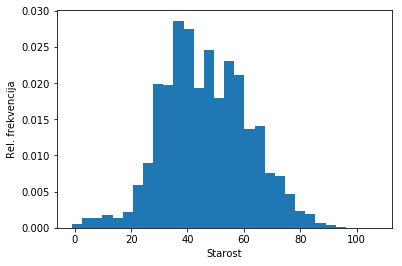

In [99]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(df['STAROST'], density = True, bins=30)
plt.ylabel('Rel. frekvencija');
plt.xlabel('Starost');